#BLOG POST 1: Data Retrieval and Cleaning

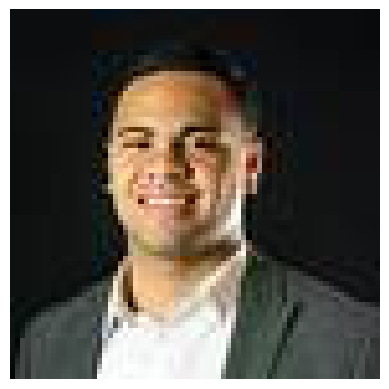

In [136]:
## IMAGE TEST
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

image_url = "YOUR_IMAGE_URL_HERE"
response = requests.get("https://avatars.slack-edge.com/2022-08-02/3887372396916_c37e1c61f0bd65b13aae_72.jpg")

# Check if the request was successful
if response.status_code == 200:
    # Open the image
    image = Image.open(BytesIO(response.content))

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
else:
    print(f"Failed to retrieve image. Status code: {response.status_code}")

In [137]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\bwegr\Desktop\MBA\Courses\STAT 386 - Data Science Process\Final Project\stat386project


In [138]:
# IMPORT DATA

# Import JSON and Create Tables
## Tables
    ### Users
    ### Channels

## Master file with all channels


import os

def get_folders_in_dir(dir):
    folders = []
    for item in os.listdir(dir):
        # Create full path
        full_path = os.path.join(dir, item)
        # Check if it's a directory
        if os.path.isdir(full_path):
            folders.append(full_path)
    return folders

# Example usage
folders = get_folders_in_dir('slack_data/')
print(folders)

['slack_data/2023-internships-rescue-brigade', 'slack_data/2024-cruise', 'slack_data/2024marketers', 'slack_data/2024_southamerica', 'slack_data/2025marketers', 'slack_data/acquisition-info-session-and-competition', 'slack_data/adam-smith-society', 'slack_data/advancedbrandfall23', 'slack_data/anime', 'slack_data/asia_2023_reunion', 'slack_data/b2b_fall_2023', 'slack_data/billion-dollar-contract', 'slack_data/blue_lounge', 'slack_data/byu_game_squad', 'slack_data/case_competitions', 'slack_data/chat', 'slack_data/christine', 'slack_data/christmas-choir-2023', 'slack_data/class-bidding-black-market', 'slack_data/club-blue-forge', 'slack_data/club_analytics', 'slack_data/club_gea', 'slack_data/club_gfa', 'slack_data/club_hla', 'slack_data/club_mbama', 'slack_data/club_mbats', 'slack_data/club_pma', 'slack_data/corporatefinancialreporting-mba501', 'slack_data/course-catalog', 'slack_data/fantasyfootball', 'slack_data/FC_F063PH5B2MA_Type something', 'slack_data/fine_arts', 'slack_data/hay-

In [139]:
import json
import pandas as pd

def read_json_files(folders):
    all_data = pd.DataFrame()

    for folder in folders:
        for file in os.listdir(folder):
            if file.endswith('.json'):
                file_path = os.path.join(folder, file)
                with open(file_path, 'r') as json_file:
                    data = pd.DataFrame(json.load(json_file))
                    data.insert(0, 'channel', file)
                    all_data.append(data, ignore_index=True)
    return all_data

# Example usage
#folder_paths = ['/path/to/folder1', '/path/to/folder2']
all = read_json_files(folders)
#data = pd.DataFrame(all)
#data
all

C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\722934382.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local

""


In [140]:
print(all)

Empty DataFrame
Columns: []
Index: []


In [141]:
def read_json_files(folders):
    all_data = pd.DataFrame()

    for folder in folders:
        if not os.path.exists(folder):
            print(f"Folder not found: {folder}")
            continue

        for file in os.listdir(folder):
            if file.endswith('.json'):
                file_path = os.path.join(folder, file)

                try:
                    with open(file_path, 'r') as json_file:
                        data = pd.read_json(json_file)
                        data.insert(0, 'date', file[0:10])
                        data.insert(0, 'channel', folder[11:])
                        all_data = all_data.append(data, ignore_index=True)
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

    return all_data

# Example usage
#folder_paths = ['/path/to/folder1', '/path/to/folder2']
data = read_json_files(folders)
#print(data)

C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\682502398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\682502398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\682502398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ignore_index=True)
C:\Users\bwegr\AppData\Local\Temp\ipykernel_10088\682502398.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(data, ign

In [142]:
data

,channel,date,client_msg_id,type,text,user,ts,blocks,team,user_team,...,date_delete,url_private_download,shares,inviter,last_read,x_files,root,username,app_id,hidden
0,2023-internships-rescue-brigade,2023-10-18,A3596BA8-FC44-4B86-8236-C9152409AE8F,message,"Hola muchachones , los créditos de cada semest...",U03M8T51VUY,1.697639e+09,"[{'type': 'rich_text', 'block_id': 'kdJP8', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-internships-rescue-brigade,2023-10-18,C141977D-A33B-4169-BC8C-22A78F89D3D3,message,Es lo que Christine me dijo. Podés preguntarle...,U03LK4ZPZ4J,1.697639e+09,"[{'type': 'rich_text', 'block_id': '8jBTM', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-internships-rescue-brigade,2023-10-18,5C0F4402-3BF3-42AE-A23F-99A34774D4C5,message,Buenísimo,U03M8T51VUY,1.697640e+09,"[{'type': 'rich_text', 'block_id': 'dh4dY', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-internships-rescue-brigade,2023-10-18,FF5FB03E-48AD-427A-82AB-43DCFFD8E4C5,message,Gracias,U03M8T51VUY,1.697640e+09,"[{'type': 'rich_text', 'block_id': '8VnI7', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-internships-rescue-brigade,2023-10-19,9BE97A04-A58D-45F8-97DB-D377984AE836,message,"Listo, ya confirme con Christine mis créditos ...",U03M8T51VUY,1.697728e+09,"[{'type': 'rich_text', 'block_id': 'X0wyY', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,y-hikers,2023-10-13,2480C1C8-1CE2-4455-B3DB-E72B07A78AB0,message,Thanks for the update!,U03LK4YF3A6,1.697244e+09,"[{'type': 'rich_text', 'block_id': 'VSUE8', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2744,y-hikers,2023-10-13,002216f5-e7a3-44af-933d-535d5b470c71,message,A primer on everyone's favorite oyster idiom...,U03LK39PKRR,1.697254e+09,"[{'type': 'rich_text', 'block_id': 'LIV48', 'e...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2745,y-hikers,2023-10-13,EFCEABA8-CC03-456E-9353-DDCEAA0D020A,message,Wow. Phenomenal,U03LK4YBK7C,1.697259e+09,"[{'type': 'rich_text', 'block_id': 'oqmt0', 'e...",T0ZBAEL59,T0ZBAEL59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746,y-hikers,2023-10-14,5f70e832-058a-425a-aac8-02124266f89c,message,I'm over here reacting to posts with lame yell...,U03LK39PKRR,1.697299e+09,"[{'type': 'rich_text', 'block_id': 'SNgyE', 'e...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
data.describe()

,ts,thread_ts,reply_count,reply_users_count,latest_reply,is_locked,subscribed,upload,display_as_bot,created,size,date_delete,last_read,hidden
count,2.728000e+03,1.824000e+03,396.000000,396.000000,3.960000e+02,396.0,396.000000,256.0,231.0,2.000000e+01,20.000000,20.0,1.800000e+01,1.0
mean,1.697514e+09,1.697501e+09,3.573232,2.755051,1.697597e+09,0.0,0.045455,0.0,0.0,1.695944e+09,12.150000,0.0,1.697537e+09,1.0
std,7.483131e+05,8.236122e+05,3.691549,2.601480,7.647756e+05,0.0,0.208562,0.0,0.0,2.055917e+06,10.327658,0.0,7.548636e+05,NaN
min,1.696248e+09,1.690861e+09,1.000000,1.000000,1.696267e+09,0.0,0.000000,0.0,0.0,1.691348e+09,0.000000,0.0,1.696301e+09,1.0
25%,1.696917e+09,1.696958e+09,1.000000,1.000000,1.696981e+09,0.0,0.000000,0.0,0.0,1.694434e+09,0.000000,0.0,1.697001e+09,1.0
50%,1.697512e+09,1.697553e+09,2.000000,2.000000,1.697650e+09,0.0,0.000000,0.0,0.0,1.695764e+09,14.000000,0.0,1.697526e+09,1.0
75%,1.698162e+09,1.698117e+09,5.000000,3.000000,1.698200e+09,0.0,0.000000,0.0,0.0,1.697767e+09,14.750000,0.0,1.698110e+09,1.0
max,1.698815e+09,1.698813e+09,29.000000,19.000000,1.698873e+09,0.0,1.000000,0.0,0.0,1.698813e+09,31.000000,0.0,1.698690e+09,1.0


In [144]:
csv_file_path = 'all.csv'
data.to_csv(csv_file_path, index=False)
all0 = data

PermissionError: [Errno 13] Permission denied: 'all.csv'

Visualization Ideas

Network graph with pictures that show connection across all channels
Channel Membership network graph

In [ ]:
# Users
upath = "slack_data/users.json"
with open(upath, 'r') as json_file:
    users = pd.read_json(json_file)

#users

# Channel Membership
cpath = "slack_data/channels.json"
with open(cpath, 'r') as json_file:
    chans = pd.read_json(json_file)

chans



#

,id,name,created,creator,is_archived,is_general,members,pins,topic,purpose
0,C0ZCSJTC5,chat,1460253148,U0ZCWRFG9,False,False,"[UKA415K3N, U015X3X6879, U016AEMQBNH, U0171LXH...","[{'id': '1683566797.160659', 'type': 'C', 'cre...","{'value': 'Water cooler conversations', 'creat...",{'value': 'General questions or information pa...
1,C6G65DSLW,club_gea,1501275438,U6F6GHNH1,False,False,"[U0171LXH940, U01ADTASMMZ, U022RACMF9S, U023GG...","[{'id': '1602646143.067300', 'type': 'C', 'cre...","{'value': '', 'creator': '', 'last_set': 0}",{'value': 'GEA members and Entrepreneurship Tr...
2,C6PSTJ44D,club_gfa,1502945784,U6EQ4BN9X,False,False,"[U0171LXH940, U022G38TVBP, U023GGYV37G, U03L4G...","[{'id': '1589389970.001900', 'type': 'C', 'cre...","{'value': '', 'creator': '', 'last_set': 0}","{'value': 'Graduate Finance Association', 'cre..."
3,C6VUTH16Y,women-in-management-wim,1504107161,U6W59FSBY,False,False,"[UKA415K3N, U0171LXH940, U01ADTASMMZ, U022G387...","[{'id': '1662994569.315089', 'type': 'C', 'cre...","{'value': '', 'creator': '', 'last_set': 0}",{'value': 'Collaborate as we provide individua...
4,CCFQAD32Q,club_mbats,1535392009,U751Q7E6R,False,False,"[U0171LXH940, U01ADTASMMZ, U022KBV79MH, U023GG...",NaN,"{'value': '', 'creator': '', 'last_set': 0}",{'value': 'MBA Tech Society - a place to get u...
...,...,...,...,...,...,...,...,...,...,...
77,C060X0FSL3G,y-hikers,1697224050,U03LK4YF3A6,False,False,"[U03LK39PKRR, U03LK4YBK7C, U03LK4YF3A6, U03LXQ...",NaN,"{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}"
78,C06138J3GTA,nw-tech-trip-november2023,1696907643,U05AQGJMMT6,False,False,"[U01ADTASMMZ, U03L4GN325D, U03LXQE14NM, U03M8T...",NaN,"{'value': '', 'creator': '', 'last_set': 0}","{'value': 'Channel to discuss cheap flights, A..."
79,C061ESK6JBB,acquisition-info-session-and-competition,1697208537,U03LKPR602X,False,False,"[U03L4GT3B55, U03L57R4HN3, U03LCGM9XML, U03LG7...",NaN,"{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}"
80,C062EFEMVRN,thinktank_fall2023,1697649458,U05A7HE5MTR,False,False,"[U05A7HE11LP, U05A7HE5MTR, U05AK5GQJ5B, U05B0N...",NaN,"{'value': '', 'creator': '', 'last_set': 0}","{'value': '', 'creator': '', 'last_set': 0}"


In [ ]:
users[['id', 'real_name']]

,id,real_name
0,U0ZCQR33J,NaN
1,U0ZCWRFG9,NaN
2,U118KG2FN,NaN
3,U118S24FN,NaN
4,U118UDSBZ,NaN
...,...,...
1173,U05TM6XE6V8,Aria McComber
1174,U05V0CXRKN2,Google Sheets
1175,U05V5JL8GUR,Ben Iverson
1176,U05V7DW6SR0,QOTD


In [ ]:
chanmem = []
for name, i in zip(chans['name'], chans['members']): chanmem.append(i)

type(chanmem[1])

list

In [ ]:
# Who Reacts Most? (Top Ten Reactors)
import re

react1 = pd.DataFrame(data[data['reactions'].notna()][['user','reactions']])

def num_and_sum(s):
    pattern = r"'count': (\d+)"
    counts = [int(num) for num in re.findall(pattern, s)]
    return sum(counts)

react1['sum_counts'] = react1['reactions'].astype(str).apply(num_and_sum)
react1

,user,reactions,sum_counts
11,U022KBV79MH,"[{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...",2
12,U03LK4ZPZ4J,"[{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...",2
19,U022KBV79MH,"[{'name': '+1', 'users': ['U03LMGXDFB6'], 'cou...",1
20,U03LMGXDFB6,"[{'name': '+1', 'users': ['U022KBV79MH'], 'cou...",1
21,U03LXQE14NM,"[{'name': 'point_up_2', 'users': ['U03LXQFQS3B...",2
...,...,...,...
2728,U03LN7V9M0U,"[{'name': 'heartpulse', 'users': ['U03P8MY0DR7...",2
2729,U03LK4YBK7C,"[{'name': 'hearts', 'users': ['U03M8T87HDE', '...",4
2740,U03LK4YF3A6,"[{'name': '+1', 'users': ['U05AMVCTLRZ'], 'cou...",1
2744,U03LK39PKRR,"[{'name': 'joy', 'users': ['U03LK4YF3A6', 'U05...",3


In [ ]:
react1a = react1.groupby('user')['sum_counts'].sum().reset_index()
react1a

,user,sum_counts
0,U0171LYGQ2U,1
1,U022KBV79MH,4
2,U026AGC0FDY,1
3,U03AVEWPUQN,46
4,U03L4GLKLTZ,130
...,...,...
141,U05HK2SC7SM,1
142,U05HK2SEC8H,3
143,U05HW4UU20Y,3
144,U05MZL0DLVC,1


In [ ]:
import ast

# The input string
input_string = "[{'name': 'hearts', 'users': ['U03L4GUGBF1', 'U03L4GP8ZMM', 'U03LG7DNSUV', 'U03PKR5GQUQ', 'U03P8MY0DR7', 'U05A7HF1DJB'], 'count': 6}, {'name': 'woman-golfing', 'users': ['U03L4GUGBF1', 'U03L4GP8ZMM'], 'count': 2}, {'name': 'dancer', 'users': ['U03L4GUGBF1'], 'count': 1}]"

# Convert the string to a list of dictionaries
data = ast.literal_eval(input_string)

# Initialize an empty dictionary with desired keys
result = {'name': [], 'users': [], 'count': []}

# Iterate through each item and populate the result dictionary
for item in data:
    result['name'].extend([item['name']] * item['count'])
    result['users'].extend(item['users'])
    result['count'].extend([item['count']] * item['count'])

print(result)
df = pd.DataFrame(result)
df

{'name': ['hearts', 'hearts', 'hearts', 'hearts', 'hearts', 'hearts', 'woman-golfing', 'woman-golfing', 'dancer'], 'users': ['U03L4GUGBF1', 'U03L4GP8ZMM', 'U03LG7DNSUV', 'U03PKR5GQUQ', 'U03P8MY0DR7', 'U05A7HF1DJB', 'U03L4GUGBF1', 'U03L4GP8ZMM', 'U03L4GUGBF1'], 'count': [6, 6, 6, 6, 6, 6, 2, 2, 1]}


,name,users,count
0,hearts,U03L4GUGBF1,6
1,hearts,U03L4GP8ZMM,6
2,hearts,U03LG7DNSUV,6
3,hearts,U03PKR5GQUQ,6
4,hearts,U03P8MY0DR7,6
5,hearts,U05A7HF1DJB,6
6,woman-golfing,U03L4GUGBF1,2
7,woman-golfing,U03L4GP8ZMM,2
8,dancer,U03L4GUGBF1,1


In [ ]:
import ast
from pandas import json_normalize

def convert_string_to_dict(s):
    data = ast.literal_eval(s)
    result = {'name': [], 'users': [], 'count': []}
    
    for item in data:
        result['name'].extend([item['name']] * item['count'])
        result['users'].extend(item['users'])
        result['count'].extend([item['count']] * item['count'])
    
    return result

list_of_dic = react1['reactions'].astype(str).apply(convert_string_to_dict).tolist()

# Convert each dictionary to a DataFrame and store in a list
#dfs = [pd.DataFrame(d) for d in list_of_dic]

# Concatenate all DataFrames into one
react2 = pd.DataFrame({'name': [], 'users': [], 'count': []})
for i in list_of_dic:
    #print("dict:", i)
    max_length = max(len(lst) for lst in i.values())
    for key in i:
        i[key].extend([None] * (max_length - len(i[key])))
    #print("dict2:", i)
    df = pd.DataFrame(i)
    #print("df:", df)
    #print("final:", final)
    react2 = pd.concat([react2, df], ignore_index=True)

react2


,name,users,count
0,+1,U03M8T51VUY,1.0
1,sunglasses,U03M8T51VUY,1.0
2,+1,U03M8T51VUY,1.0
3,cool-doge,U03M8T51VUY,1.0
4,+1,U03LMGXDFB6,1.0
...,...,...,...
5462,+1,U05AMVCTLRZ,1.0
5463,joy,U03LK4YF3A6,2.0
5464,joy,U05B0NHD3LZ,2.0
5465,kirsipurejoy,U03LK4YBK7C,1.0


In [ ]:
react2b = pd.merge(react2, users[['id', 'real_name']], left_on='users', right_on = 'id', how='left')
react2b

,name,users,count,id,real_name
0,+1,U03M8T51VUY,1.0,U03M8T51VUY,Jesús Mata
1,sunglasses,U03M8T51VUY,1.0,U03M8T51VUY,Jesús Mata
2,+1,U03M8T51VUY,1.0,U03M8T51VUY,Jesús Mata
3,cool-doge,U03M8T51VUY,1.0,U03M8T51VUY,Jesús Mata
4,+1,U03LMGXDFB6,1.0,U03LMGXDFB6,Fabian Serradell
...,...,...,...,...,...
5462,+1,U05AMVCTLRZ,1.0,U05AMVCTLRZ,Travis Crosby
5463,joy,U03LK4YF3A6,2.0,U03LK4YF3A6,Kelsee Gates
5464,joy,U05B0NHD3LZ,2.0,U05B0NHD3LZ,Kalie Johnson
5465,kirsipurejoy,U03LK4YBK7C,1.0,U03LK4YBK7C,Kirsi Jarvis


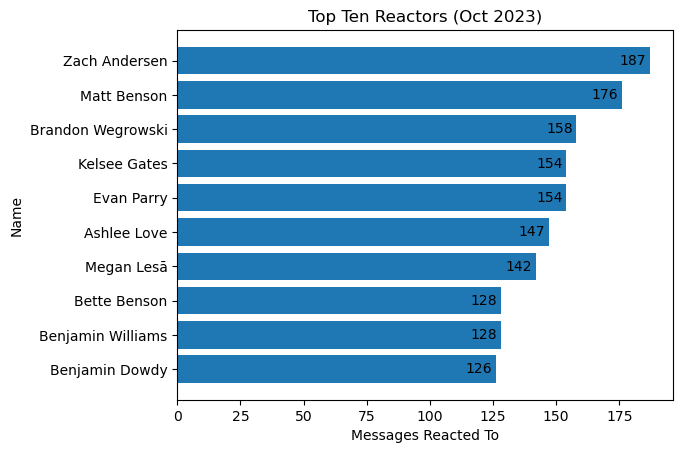

In [ ]:
import matplotlib.pyplot as plt

react2a = react2b[['real_name', 'count']].groupby('real_name').count().reset_index().sort_values(by='count', ascending=False)
paired = sorted(zip(react2a['count'][0:10], react2a['real_name'][0:10]))
count_s, users_s = zip(*paired)
plt.barh(users_s, count_s)
for index, value in enumerate(count_s):
    plt.text(value-12, index, str(value), va='center')
plt.xlabel('Messages Reacted To')
plt.ylabel('Name')
plt.title('Top Ten Reactors (Oct 2023)')
plt.show()

In [ ]:
for index, row in react1.iterrows():
    
    print(f"Index: {index}, Row: {row}")

# react2 = [pd.read_json(i) ]
# react2

Index: 11, Row: user                                                U022KBV79MH
reactions     [{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...
sum_counts                                                    2
Name: 11, dtype: object
Index: 12, Row: user                                                U03LK4ZPZ4J
reactions     [{'name': '+1', 'users': ['U03M8T51VUY'], 'cou...
sum_counts                                                    2
Name: 12, dtype: object
Index: 19, Row: user                                                U022KBV79MH
reactions     [{'name': '+1', 'users': ['U03LMGXDFB6'], 'cou...
sum_counts                                                    1
Name: 19, dtype: object
Index: 20, Row: user                                                U03LMGXDFB6
reactions     [{'name': '+1', 'users': ['U022KBV79MH'], 'cou...
sum_counts                                                    1
Name: 20, dtype: object
Index: 21, Row: user                                                U03L

In [ ]:
react2

,name,users,count
0,+1,U03M8T51VUY,1.0
1,sunglasses,U03M8T51VUY,1.0
2,+1,U03M8T51VUY,1.0
3,cool-doge,U03M8T51VUY,1.0
4,+1,U03LMGXDFB6,1.0
...,...,...,...
5462,+1,U05AMVCTLRZ,1.0
5463,joy,U03LK4YF3A6,2.0
5464,joy,U05B0NHD3LZ,2.0
5465,kirsipurejoy,U03LK4YBK7C,1.0


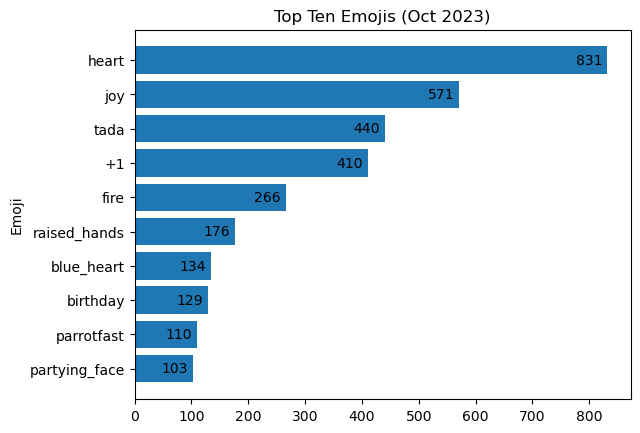

In [ ]:
# What are the most popular emojis? (Top Ten Reactions)
react2c = react2[['name', 'count']].groupby('name').count().reset_index().sort_values(by='count', ascending=False)
paired = sorted(zip(react2c['count'][0:10], react2c['name'][0:10]))
count_s, emoji_s = zip(*paired)
plt.barh(emoji_s, count_s)
for index, value in enumerate(count_s):
    plt.text(value-55, index, str(value), va='center')
#plt.xlabel('Count')
plt.ylabel('Emoji')
plt.title('Top Ten Emojis (Oct 2023)')
plt.show()


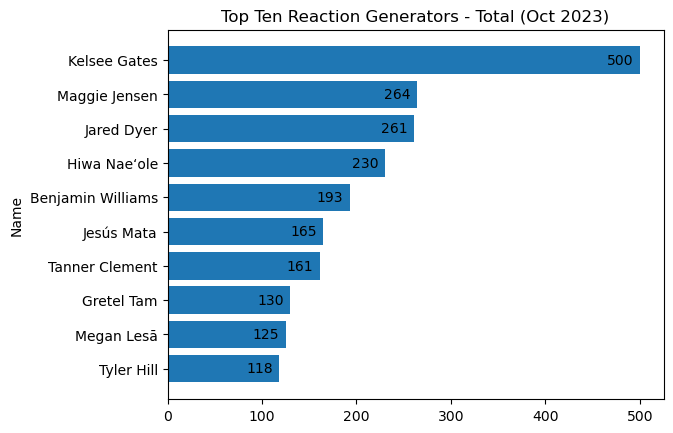

In [ ]:
# Who generates the most reactions? (Top Ten Reaction Generators) - % and Total
react1b = pd.merge(react1a, users[['id', 'real_name']], left_on='user', right_on = 'id', how='left')
react1b

react1c = react1b.sort_values(by='react_count', ascending=False)
paired = sorted(zip(react1c['react_count'][0:10], react1c['real_name'][0:10]))
count_s, user_s = zip(*paired)
plt.barh(user_s, count_s)
for index, value in enumerate(count_s):
    plt.text(value-35, index, str(value), va='center')
#plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top Ten Reaction Generators - Total (Oct 2023)')
plt.show()


In [ ]:
react1b

,user,react_count,id,real_name
0,U0171LYGQ2U,1,U0171LYGQ2U,Kim Taylor
1,U022KBV79MH,4,U022KBV79MH,Alexander Navarro
2,U026AGC0FDY,1,U026AGC0FDY,Hannah Jones
3,U03AVEWPUQN,46,NaN,NaN
4,U03L4GLKLTZ,130,U03L4GLKLTZ,Gretel Tam
...,...,...,...,...
141,U05HK2SC7SM,1,U05HK2SC7SM,Braden Whitaker
142,U05HK2SEC8H,3,U05HK2SEC8H,Jared Davis
143,U05HW4UU20Y,3,U05HW4UU20Y,Sterling Baker
144,U05MZL0DLVC,1,U05MZL0DLVC,Amanda Porter


In [145]:
react1a

,user,react_count
0,U0171LYGQ2U,1
1,U022KBV79MH,4
2,U026AGC0FDY,1
3,U03AVEWPUQN,46
4,U03L4GLKLTZ,130
...,...,...
141,U05HK2SC7SM,1
142,U05HK2SEC8H,3
143,U05HW4UU20Y,3
144,U05MZL0DLVC,1


(6.73, 7.04, 7.17, 7.38, 8.5, 10.14, 13.2, 14.0, 19.67, 20.91) ('Hyrum Dean', 'Kelsee Gates', 'Carter Fritz', 'Karen Membreno', 'Jake Preslar', 'Cheryl Wong', 'Matt Singer', 'Matt Assily', 'Madeleine Reber', 'Hiwa Naeʻole')


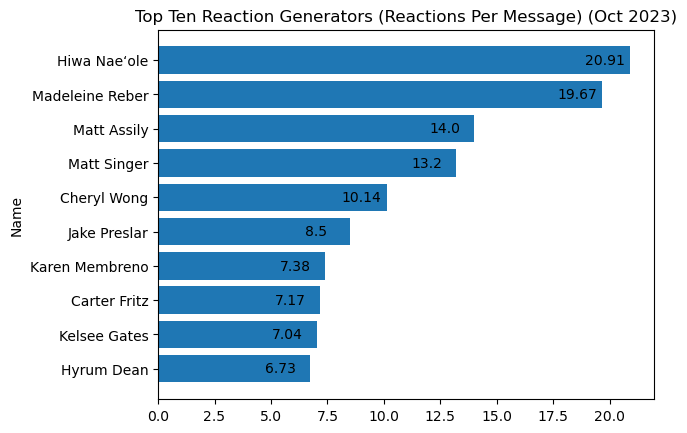

In [184]:
import numpy as np

mess1 = all0[['user','ts']].groupby('user').count().reset_index().sort_values(by='ts', ascending=False).dropna()
mess1.rename(columns={'ts': 'mess_count'}, inplace=True)
react1a.rename(columns={'sum_counts': 'react_count'}, inplace=True)
mess1a = pd.merge(pd.merge(react1a, mess1, on='user', how='left'), users[['id', 'real_name']], left_on='user', right_on = 'id', how='left')
mess1a['re_per_mes'] = round(mess1a['react_count']/mess1a['mess_count'],2)
mess1a = mess1a[['real_name', 're_per_mes']]
mess1a['real_name'] = mess1a['real_name'].astype(str)

mess1b = mess1a.sort_values(by='re_per_mes', ascending=False)
paired = sorted(zip(mess1b['re_per_mes'][0:10], mess1b['real_name'][0:10]))
count_s, user_s = zip(*paired)
print(count_s, user_s)
plt.barh(user_s, count_s)
for index, value in enumerate(count_s):
    plt.text(value-2, index, str(value), va='center')
#plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top Ten Reaction Generators - Reactions Per Message (Oct 2023)')
plt.show()

(18, 20, 20, 23, 23, 24, 25, 27, 29, 32, 33, 33, 35, 36, 39, 39, 39, 40, 43, 48) ('Ben Nzojibwami', 'Ashlee Love', 'Chad Larson', 'Chris Maljanovski', 'Johnny Blood', 'Adam Navar', 'Moses Lotulelei', 'Julio Cesar Augusto', 'Alexis Belliston', 'Brandon Wegrowski', 'Benjamin Williams', 'Megan Lesā', 'Kelsee Gates', 'Maggie Jensen', 'Jared Dyer', 'Taylor Brooks', 'Tyler Hill', 'Brittany Bennion', 'Bette Benson', 'Spencer Larson')


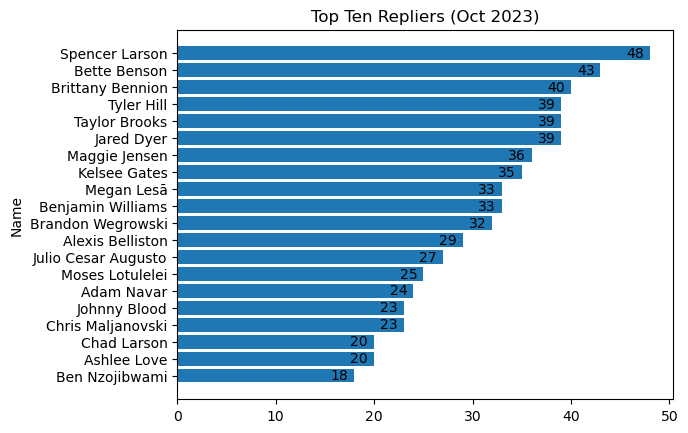

In [200]:
# Who Replies Most? (Top Ten Repliers)
reply = all0[['user', 'parent_user_id']].dropna().groupby('user').count().reset_index().sort_values(by='parent_user_id', ascending=False)
reply.rename(columns={'parent_user_id': 'reply_count'}, inplace=True)
reply1 = pd.merge(reply, users[['id', 'real_name']], left_on='user', right_on = 'id', how='left')

paired = sorted(zip(reply1['reply_count'][0:20], reply1['real_name'][0:20]))
count_s, user_s = zip(*paired)
print(count_s, user_s)
plt.barh(user_s, count_s)
for index, value in enumerate(count_s):
    plt.text(value-2.4, index, str(value), va='center')
#plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top Ten Repliers (Oct 2023)')
plt.show()


            user  replies_gen           id              real_name
0    U03LK4YF3A6           76  U03LK4YF3A6           Kelsee Gates
1    U03L4GT3B55           65  U03L4GT3B55          Maggie Jensen
2    U05BBQG8FTJ           54  U05BBQG8FTJ             JJ LeMoine
3    U03LG7C5QAH           52  U03LG7C5QAH             Tyler Hill
4    U03LK3D5N2X           41  U03LK3D5N2X           Bette Benson
..           ...          ...          ...                    ...
111  U03LG776WFP            1  U03LG776WFP      Hunter Schenewark
112  U03LCGQCM2S            1  U03LCGQCM2S  Christina Yadan Zhang
113  U03LCGQ9L6S            1  U03LCGQ9L6S            Clark Boody
114  U05MZL0CBF0            1  U05MZL0CBF0             Nate Hardy
115  U026ANC3WH1            1  U026ANC3WH1         Francis Umoren

[116 rows x 4 columns]
(22, 22, 22, 23, 24, 24, 28, 30, 30, 32, 32, 34, 36, 38, 39, 41, 52, 54, 65, 76) ('Evan Parry', 'Hillary Slater', 'Tyler Johnson', 'Taylor Brooks', 'Brenna Porter', 'Jesús Mata', 'Dieg

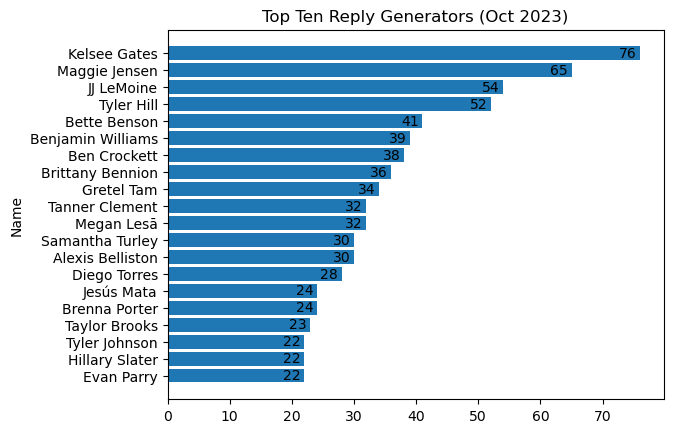

In [215]:
# Who generates the most replies? (Top Ten Reply Generators)
reply2 = all0[['parent_user_id', 'ts']].dropna().groupby('parent_user_id').count().reset_index().sort_values(by='ts', ascending=False)
reply2.rename(columns={'parent_user_id': 'user', 'ts': 'replies_gen'}, inplace=True)
reply2a = pd.merge(reply2, users[['id', 'real_name']], left_on='user', right_on = 'id', how='left')
print(reply2a)

paired = sorted(zip(reply2a['replies_gen'][0:20], reply2a['real_name'][0:20]))
count_s, user_s = zip(*paired)
print(count_s, user_s)
plt.barh(user_s, count_s)
for index, value in enumerate(count_s):
    plt.text(value-3.4, index, str(value), va='center')
#plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top Ten Reply Generators (Oct 2023)')
plt.show()

            user  avg_reply_time           id          real_name
0    U05DD0QU5MK            3.59  U05DD0QU5MK       Brandon Ward
1    U05AN01UD1R            4.07  U05AN01UD1R         Upen Rijal
2    U03M8T6EJ8G            5.07  U03M8T6EJ8G      Glenn Davalos
3    U03M8T9K6SU            6.29  U03M8T9K6SU        Chris Lundy
4    U03LG779KGD            7.34  U03LG779KGD      Marcos Orfila
..           ...             ...          ...                ...
110  U03L4GP8ZMM         8036.66  U03L4GP8ZMM        Laura Kerey
112  U03LK39PKRR        11510.05  U03LK39PKRR  Brandon Wegrowski
113  U03LK39EPB5        13417.06  U03LK39EPB5      Robyn de Kock
114  U03LXQCEVKK        14863.74  U03LXQCEVKK      Taylor Brooks
115  U026ANC3WH1        93121.18  U026ANC3WH1     Francis Umoren

[114 rows x 4 columns]
(53.24, 39.31, 38.15, 37.31, 33.78, 30.82, 28.91, 28.65, 28.52, 20.53, 13.64, 11.69, 8.41, 7.83, 7.48, 7.34, 6.29, 5.07, 4.07, 3.59) ('Fabian Serradell', 'Austin Schofield', 'Nikki Maxon', 'Carter

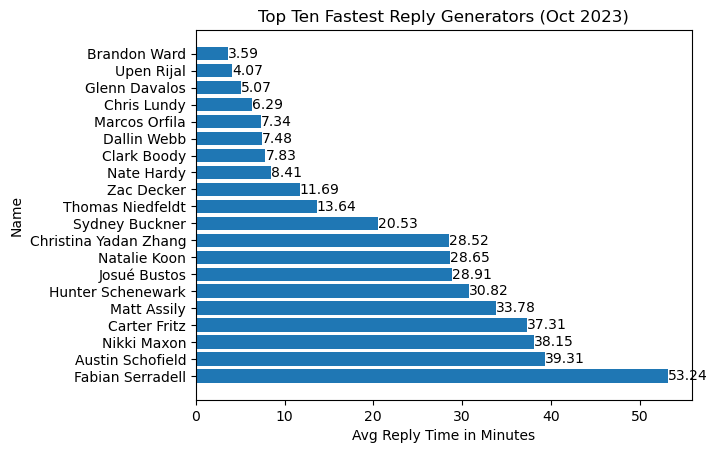

In [265]:
# Who generates the fastest replies? (out of 10+?) have side by side with number of total replies (Top Ten)
reply3 = all0[['parent_user_id', 'thread_ts', 'ts']].dropna()
reply3['reply_time'] = (reply3['thread_ts'] - reply3['ts'])/60*-1
reply3 = reply3.groupby('parent_user_id')['reply_time'].mean().reset_index().sort_values(by='reply_time', ascending=True)
reply3.rename(columns={'parent_user_id': 'user', 'reply_time': 'avg_reply_time'}, inplace=True)
reply3a = pd.merge(reply3, users[['id', 'real_name']], left_on='user', right_on = 'id', how='left').dropna()
reply3a['real_name'] = reply3a['real_name'].astype(str)
reply3a['avg_reply_time'] = round(reply3a['avg_reply_time'], 2)
print(reply3a)

paired = sorted(zip(reply3a['avg_reply_time'][0:20], reply3a['real_name'][0:20]), reverse=True)
count_s, user_s = zip(*paired)
print(count_s, user_s)
plt.barh(user_s, count_s)
for index, value in enumerate(count_s):
    plt.text(value, index, str(value), va='center')
plt.xlabel('Avg Reply Time in Minutes')
plt.ylabel('Name')
plt.title('Top Ten Fastest Reply Generators (Oct 2023)')
plt.show()


In [ ]:
# What kind of networks exist among channels? PyVis
from pyvis.network import Network
import random

chan_mems = {}
for index, row in chans.iterrows():
    chan_mems[row['name']] = row['members']

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True, cdn_resources='remote')

# Add nodes and edges
for group, members in chan_mems.items():
    net.add_node(group, group, color='red', shape='dot')  # Add group as a node
    for member in members:
        net.add_node(member, member, color='blue', shape='dot')  # Add member as a node
        net.add_edge(group, member)  # Create an edge between the group and the member

# Enable physics for interactive behavior
net.toggle_physics(True)

physics_options = {
    "barnesHut": {
        "gravitationalConstant": -30000,
        "centralGravity": 0.3,
        "springLength": 250,
        "springConstant": 0.04,
        "damping": 0.09,
        "avoidOverlap": 0.1
    },
    "maxVelocity": 50,
    "minVelocity": 0.1
}

physics_options_json = json.dumps(physics_options)

net.set_options("""
{
  "physics": %s
}
""" % physics_options_json)

# Generate and display the network graph
net.show("channel_membership._network1.html")


In [263]:
net

<class 'pyvis.network.Network'> |N|=315 |E|=3,144

In [288]:
replynet = all0[['user', 'parent_user_id']].dropna().reset_index()[['user', 'parent_user_id']].drop_duplicates()
replynet = replynet[replynet['user'] != replynet['parent_user_id']]
replynet

,user,parent_user_id
0,U022KBV79MH,U03M8T51VUY
1,U03LMGXDFB6,U03M8T51VUY
2,U03LMGYLSR2,U03LXQE14NM
4,U03LK3D5N2X,U03L4GT3B55
12,U03LK39PKRR,U03L4GT3B55
...,...,...
1411,U03L4GT3B55,U03LYFFN24R
1414,U05A7HF1DJB,U03LYFFN24R
1415,U03LN7V9M0U,U05AN3R7398
1417,U03LN7V9M0U,U03LK5295DY


In [290]:
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)

# Add nodes and edges
for _, row in replynet.iterrows():
    user, parent_user = row['user'], row['parent_user_id']
    net.add_node(user, label=user)
    net.add_node(parent_user, label=parent_user)
    net.add_edge(user, parent_user)

# Enable physics for interactive behavior
net.toggle_physics(True)

# Display the graph
net.show("reply_network_graph.html")

reply_network_graph.html


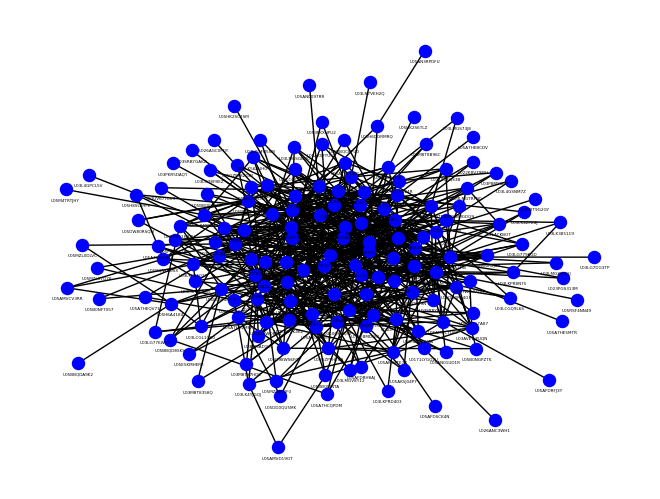

In [305]:
import networkx as nx
G = nx.Graph()

# Add nodes and edges
for _, row in replynet.iterrows():
    user, parent_user = row['user'], row['parent_user_id']
    G.add_node(user)
    G.add_node(parent_user)
    G.add_edge(user, parent_user)

# Draw the graph
pos = nx.kamada_kawai_layout(G)#, k=1, iterations=40)  # You can experiment with the k value and iterations
nx.draw(G, pos, node_size=75, font_size=3, font_color="black", node_color="blue", alpha=1)
label_pos = {key:[value[0], value[1]-0.05] for key, value in pos.items()}  # Adjust label positions
nx.draw_networkx_labels(G, label_pos, font_size=3, font_color="black")
plt.show()

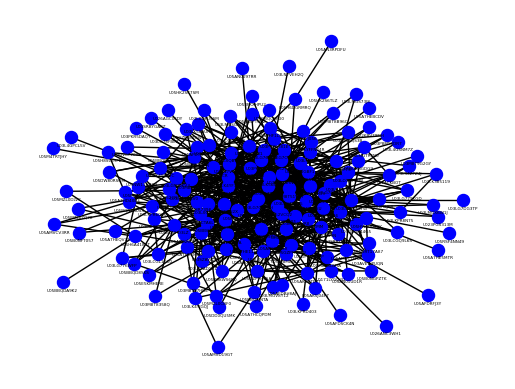

In [307]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
from PIL import Image
import requests
from io import BytesIO

G = nx.Graph()

base_image_size = 0.1

# Example: Using the same image for each node, replace with different images if needed
image_url = 'https://avatars.slack-edge.com/2022-08-02/3887372396916_c37e1c61f0bd65b13aae_72.jpg'  # Replace with your image URL or local path
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Draw the graph
fig, ax = plt.subplots()

# Add nodes and edges
for _, row in replynet.iterrows():
    user, parent_user = row['user'], row['parent_user_id']
    G.add_node(user)
    G.add_node(parent_user)
    G.add_edge(user, parent_user)

for node in G.nodes():
    x, y = pos[node]
    img_ext = ax.imshow(img, aspect='auto', extent=(x-base_image_size/2, x+base_image_size/2, y-base_image_size/2, y+base_image_size/2))

# Draw the graph
pos = nx.kamada_kawai_layout(G)#, k=1, iterations=40)  # You can experiment with the k value and iterations
nx.draw(G, pos, node_size=75, font_size=3, font_color="black", node_color="blue", alpha=1)
label_pos = {key:[value[0], value[1]-0.05] for key, value in pos.items()}  # Adjust label positions
nx.draw_networkx_labels(G, label_pos, font_size=3, font_color="black")



plt.show()

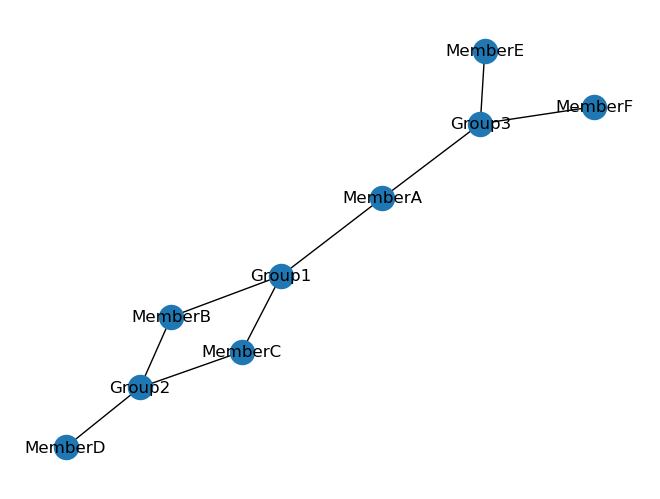

In [241]:
import networkx as nx
import matplotlib.pyplot as plt

# Define group memberships (example data)
groups = {
    "Group1": ["MemberA", "MemberB", "MemberC"],
    "Group2": ["MemberB", "MemberC", "MemberD"],
    "Group3": ["MemberE", "MemberF", "MemberA"],
    # Add more groups and members as needed
}

# Create a new graph
G = nx.Graph()

# Add nodes and edges
for group, members in groups.items():
    for member in members:
        G.add_node(member)  # Add member as a node
        G.add_edge(group, member)  # Create an edge between the group and the member

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [243]:
import pandas as pd
import networkx as nx
import hvplot.networkx as hvnx

# Example data with more members and groups
groups = {
    "Group1": [f"Member{i}" for i in range(1, 20)],
    "Group2": [f"Member{i}" for i in range(10, 30)],
    "Group3": [f"Member{i}" for i in range(25, 45)],
    # Add more groups and members as needed
}

# Create a new graph
G = nx.Graph()

# Add nodes and edges
for group, members in groups.items():
    G.add_node(group, color='red')  # Add group as a node
    for member in members:
        G.add_node(member, color='blue')  # Add member as a node
        G.add_edge(group, member)  # Create an edge between the group and the member

# Use hvplot to visualize the graph
plot = hvnx.draw(G, with_labels=True, node_color='color')
plot

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (index)

In [259]:
G = nx.Graph()

# Add nodes and edges
for group, members in chan_mems.items():
    G.add_node(group, color='red')  # Add group as a node
    for member in members:
        G.add_node(member, color='blue')  # Add member as a node
        G.add_edge(group, member)  # Create an edge between the group and the member

# Use hvplot to visualize the graph
plot = hvnx.draw(G, with_labels=True, node_color='color')
plot

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (index)

In [258]:
from pyvis.network import Network
import random
from IPython.display import IFrame

# Example data with more members and groups
groups = {
    "Group1": [f"Member{i}" for i in range(1, 20)],
    "Group2": [f"Member{i}" for i in range(10, 30)],
    "Group3": [f"Member{i}" for i in range(25, 45)],
    # Add more groups and members as needed
}

# Create a new network graph
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True, cdn_resources='in_line')

# Add nodes and edges
for group, members in groups.items():
    net.add_node(group, group, color='red', shape='dot')  # Add group as a node
    for member in members:
        net.add_node(member, member, color='blue', shape='dot')  # Add member as a node
        net.add_edge(group, member)  # Create an edge between the group and the member

# Enable physics for interactive behavior
net.toggle_physics(True)

# Generate and display the network graph
html_file_path = "network_graph.html"
net.show(html_file_path)

# Display the graph inline using IFrame
IFrame(src=html_file_path, width="100%", height="750px")

network_graph.html


In [ ]:
# What kind of networks exist among replies? PyVis



In [ ]:
# What kind of networks exist among reactions?



In [ ]:
# Channel Membership (Top Ten People with Highest Public Channel Membership) - total and % membership

In [ ]:
# Channel Membership network graph



In [ ]:
# Who Uses Emojis Most in Their Messages?